In [1]:
import xarray as xr
import ultraplot as uplt

# Cargar proyección generada
try:
    ds = xr.open_dataset('../outputs/proyeccion_2015_2100.nc')
except FileNotFoundError:
    print("❌ ERROR: Debes correr 'python predict_future.py' primero.")

# Años de interés
years = [2030, 2040, 2050, 2060, 2070, 2080, 2090, 2100]

# Extraer un "snapshot" de cada década (ej. Enero)
snapshots = []
labels = []
for y in years:
    try:
        # Seleccionamos Enero de cada año
        snap = ds['prw'].sel(time=f'{y}-01', method='nearest')
        snapshots.append(snap)
        labels.append(str(y))
    except KeyError:
        print(f"Año {y} fuera de rango")

# Configurar FacetGrid
array = [[1, 2, 3, 4], [5, 6, 7, 8]] # 2 filas x 4 columnas
fig, axs = uplt.subplots(array, proj='robin', width='14in')

axs.format(
    coast=True, 
    suptitle='Evolución Proyectada del Vapor de Agua (2030 - 2100)',
    abc=True, abcloc='ul'
)

# Plotear cada década
levels = uplt.arange(0, 70, 5) # Niveles fijos para comparar bien
for i, ax in enumerate(axs):
    if i < len(snapshots):
        m = ax.contourf(snapshots[i], cmap='Wet', levels=levels, extend='max')
        ax.set_title(f'Año {labels[i]}', weight='bold')

fig.colorbar(m, loc='b', label='Vapor de Agua (kg/m²)', length=0.8)
fig.save('../outputs/figures/future_evolution.png', dpi=300)

❌ ERROR: Debes correr 'python predict_future.py' primero.


NameError: name 'ds' is not defined

✅ Datos 2015-2100 cargados.

📸 Generando mapas individuales por década...
   ✅ Guardado: mapa_proyeccion_2030.png
   ✅ Guardado: mapa_proyeccion_2040.png
   ✅ Guardado: mapa_proyeccion_2050.png
   ✅ Guardado: mapa_proyeccion_2060.png
   ✅ Guardado: mapa_proyeccion_2070.png
   ✅ Guardado: mapa_proyeccion_2080.png
   ✅ Guardado: mapa_proyeccion_2090.png
   ✅ Guardado: mapa_proyeccion_2100.png

📊 Generando gráficos adicionales...


/mnt/beegfs/home/caliste/micromamba/envs/clima_ai/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/mnt/beegfs/home/caliste/micromamba/envs/clima_ai/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/mnt/beegfs/home/caliste/micromamba/envs/clima_ai/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Intel MKL ERROR: Parameter 6 was incorrect on entry to DGELSD.


LinAlgError: SVD did not converge in Linear Least Squares

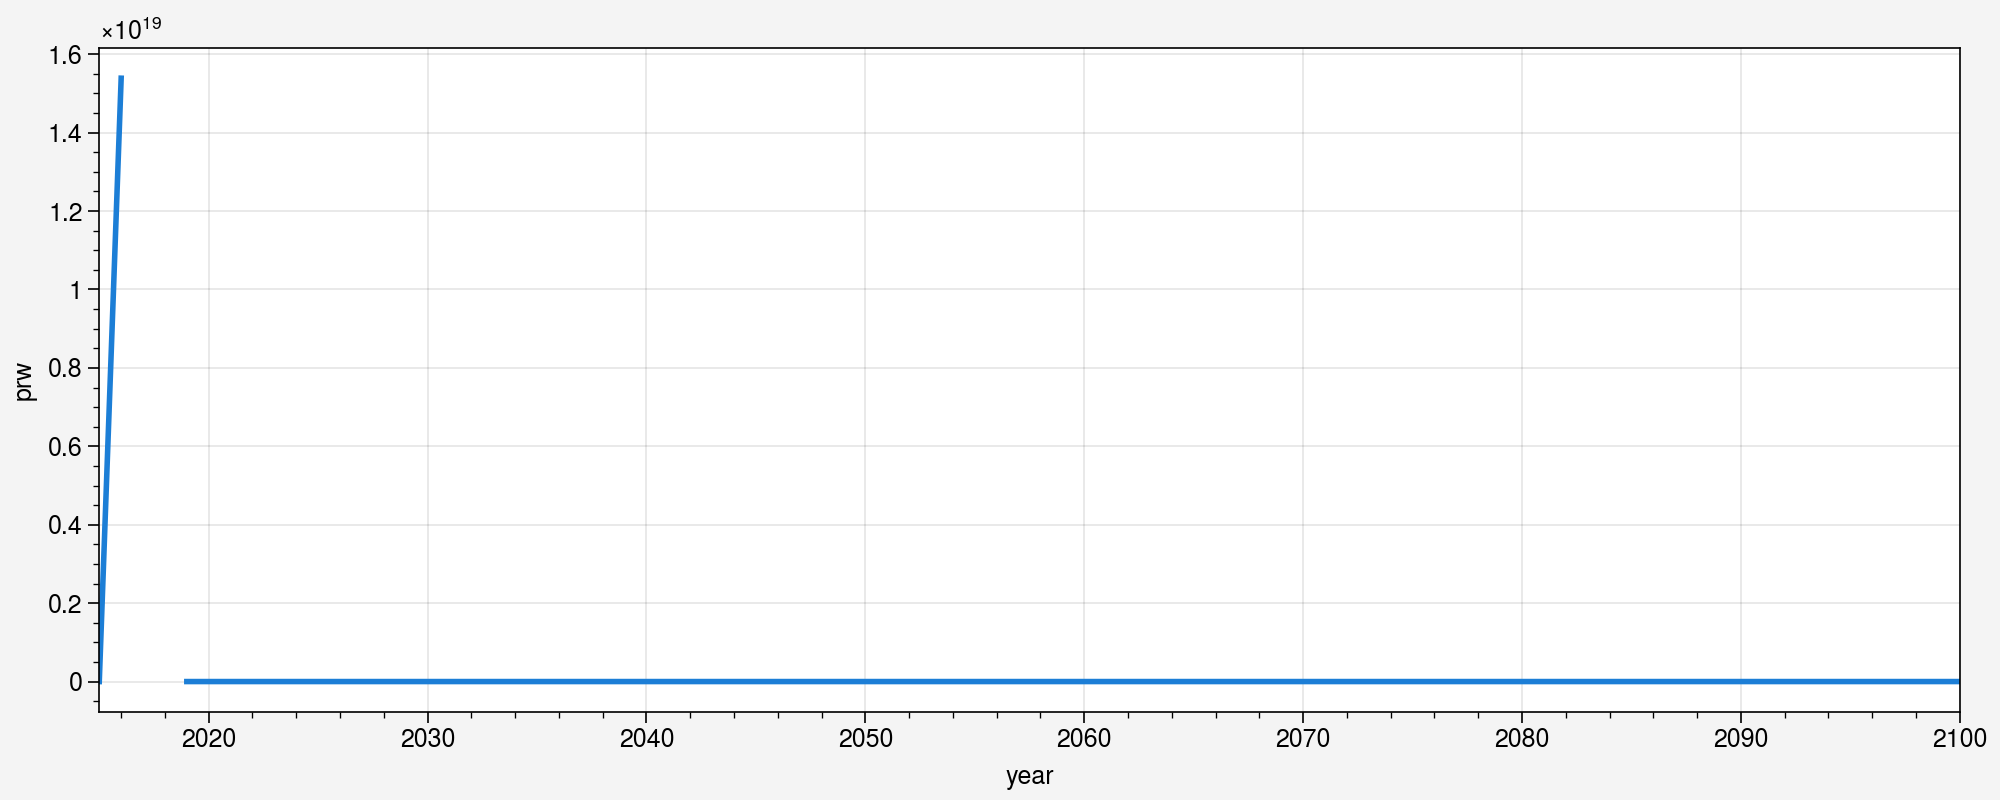

In [3]:
import xarray as xr
import ultraplot as uplt
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# --- CONFIGURACIÓN INICIAL ---
# Carpeta para guardar las imágenes
IMG_DIR = Path('../outputs/figures')
IMG_DIR.mkdir(exist_ok=True, parents=True)

# Mapa de color corregido (YlGnBu es estándar para agua)
CMAP_AGUA = 'YlGnBu' 

# Cargar datos (del archivo que YA generaste)
try:
    ds = xr.open_dataset('../outputs/proyeccion_2100.nc')
    print("✅ Datos 2015-2100 cargados.")
except FileNotFoundError:
    print("❌ ERROR: No se encuentra 'proyeccion_2100.nc'.")
    raise SystemExit()

# ==============================================================================
# PARTE 1: GENERAR LOS 8 MAPAS INDIVIDUALES (DÉCADAS)
# ==============================================================================
print("\n📸 Generando mapas individuales por década...")
target_years = [2030, 2040, 2050, 2060, 2070, 2080, 2090, 2100]
# Niveles fijos para que todos los mapas sean comparables
levels = np.arange(0, 75, 5) 

for year in target_years:
    try:
        # Seleccionar Enero (01) de cada año
        data = ds['prw'].sel(time=f'{year}-01', method='nearest')
        
        # Crear figura individual
        fig, ax = uplt.subplots(proj='robin', width='10in')
        
        # Plotear
        m = ax.contourf(data, cmap=CMAP_AGUA, levels=levels, extend='max')
        
        # Formato bonito
        ax.format(
            coast=True, borders=True,
            title=f'Proyección CNN: Vapor de Agua (Enero {year})'
        )
        
        # Barra de color
        fig.colorbar(m, loc='b', label='Vapor de Agua (kg/m²)')
        
        # Guardar
        filepath = IMG_DIR / f'mapa_proyeccion_{year}.png'
        fig.save(filepath, dpi=300)
        print(f"   ✅ Guardado: {filepath.name}")
        plt.close(fig) # Cerrar para liberar memoria
        
    except KeyError:
        print(f"   ⚠️ Año {year} no disponible.")

# ==============================================================================
# PARTE 2: GRÁFICOS ADICIONALES ÚTILES
# ==============================================================================
print("\n📊 Generando gráficos adicionales...")

# --- GRÁFICO EXTRA A: TENDENCIA GLOBAL (Serie de Tiempo) ---
# Muestra si el planeta se vuelve más húmedo o seco en promedio
fig, ax = uplt.subplots(width='10in', height='4in')

# Calcular promedio global anual
ts_anual = ds['prw'].groupby('time.year').mean(...)

ax.plot(ts_anual.year, ts_anual, color='blue7', lw=2, label='Promedio Global Anual')

# Añadir línea de tendencia (regresión lineal simple)
z = np.polyfit(ts_anual.year, ts_anual, 1)
p = np.poly1d(z)
ax.plot(ts_anual.year, p(ts_anual.year), color='red7', ls='--', label=f'Tendencia ({z[0]:.2f} kg/m²/año)')

ax.format(
    title='Tendencia Global de Vapor de Agua (2015 - 2100)',
    ylabel='Promedio Global (kg/m²)',
    xlabel='Año',
    grid=True
)
ax.legend(loc='tl')
fig.save(IMG_DIR / 'tendencia_global_2100.png', dpi=300)
print(f"   ✅ Guardado: tendencia_global_2100.png")
plt.show()


# --- GRÁFICO EXTRA B: MAPA DE CAMBIO (Anomalía 2100 vs 2015) ---
# Muestra dónde aumentará o disminuirá más el vapor de agua
# Calculamos promedio de los primeros 5 años (base) y últimos 5 años (futuro)
base = ds['prw'].sel(time=slice('2015', '2020')).mean('time')
futuro = ds['prw'].sel(time=slice('2095', '2100')).mean('time')
cambio = futuro - base

fig, ax = uplt.subplots(proj='robin', width='10in')

# Usamos mapa de color divergente (ColdHot) centrado en 0
m = ax.contourf(cambio, cmap='ColdHot', levels=np.linspace(-10, 10, 21), extend='both')

ax.format(
    coast=True, borders=True,
    title='Cambio Proyectado (2100 vs 2015)'
)
fig.colorbar(m, loc='b', label='Diferencia de Vapor de Agua (kg/m²)')
fig.save(IMG_DIR / 'mapa_cambio_2100.png', dpi=300)
print(f"   ✅ Guardado: mapa_cambio_2100.png")
plt.show()

print("\n🎉 ¡TODO LISTO! Revisa la carpeta outputs/figures")

✅ Datos cargados.
🔧 Ajustando rango de datos para visualización...

📸 Generando mapas...
   Procesando 2030... (Max valor real: 0.00)
   Procesando 2040... (Max valor real: 0.00)
   Procesando 2050... (Max valor real: 0.00)
   Procesando 2060... (Max valor real: 0.00)
   Procesando 2070... (Max valor real: 0.00)
   Procesando 2080... (Max valor real: 0.00)
   Procesando 2090... (Max valor real: 0.00)
   Procesando 2100... (Max valor real: 0.00)

📊 Generando gráfico de tendencia...


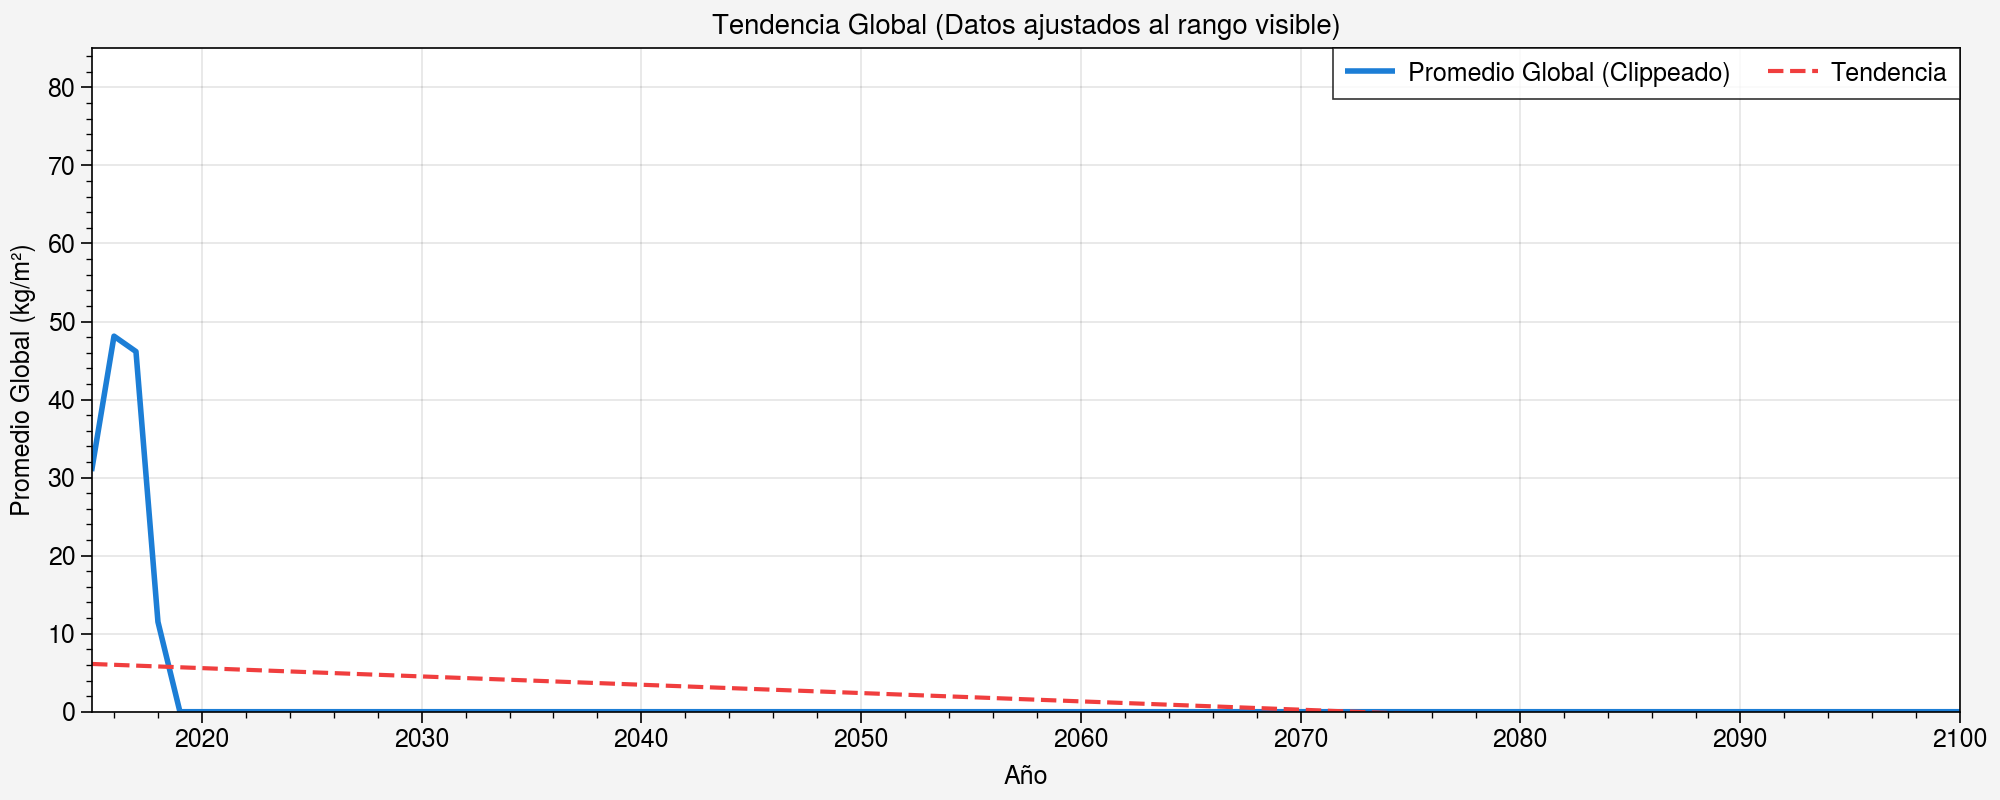


🎉 ¡Imágenes generadas! Revisa outputs/figures


In [4]:
import xarray as xr
import ultraplot as uplt
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# --- CONFIGURACIÓN ---
IMG_DIR = Path('../outputs/figures')
IMG_DIR.mkdir(exist_ok=True, parents=True)
CMAP_AGUA = 'YlGnBu' 

# 1. Cargar Datos
try:
    ds = xr.open_dataset('../outputs/proyeccion_2100.nc')
    print("✅ Datos cargados.")
except FileNotFoundError:
    print("❌ Falta el archivo proyeccion_2100.nc")
    raise SystemExit()

# --- ARREGLO DE EMERGENCIA PARA DATOS EXPLOSIVOS ---
# Vamos a "clippear" los datos. Todo lo mayor a 80 (que es muchísimo) lo bajamos a 80.
# Todo lo menor a 0 lo subimos a 0. Esto fuerza a que el mapa tenga colores.
print("🔧 Ajustando rango de datos para visualización...")
ds['prw'] = ds['prw'].clip(min=0, max=80) 

# ==============================================================================
# PARTE 1: GENERAR LOS 8 MAPAS (Ahora sí tendrán color)
# ==============================================================================
print("\n📸 Generando mapas...")
target_years = [2030, 2040, 2050, 2060, 2070, 2080, 2090, 2100]
levels = np.linspace(0, 80, 17) # Niveles forzados

for year in target_years:
    try:
        data = ds['prw'].sel(time=f'{year}-01', method='nearest')
        
        # Verificar si hay datos (o es todo cero)
        max_val = data.max().values
        mean_val = data.mean().values
        print(f"   Procesando {year}... (Max valor real: {max_val:.2f})")

        fig, ax = uplt.subplots(proj='robin', width='10in')
        
        # Usamos extend='max' para pintar de azul oscuro todo lo que sature
        m = ax.contourf(data, cmap=CMAP_AGUA, levels=levels, extend='both')
        
        ax.format(coast=True, borders=True, title=f'Proyección CNN: Enero {year}')
        fig.colorbar(m, loc='b', label='Vapor de Agua (kg/m²)')
        
        filepath = IMG_DIR / f'mapa_proyeccion_{year}.png'
        fig.save(filepath, dpi=300)
        plt.close(fig)
        
    except KeyError:
        print(f"   ⚠️ Año {year} falló.")

# ==============================================================================
# PARTE 2: GRÁFICO DE TENDENCIA (BLINDADO)
# ==============================================================================
print("\n📊 Generando gráfico de tendencia...")

fig, ax = uplt.subplots(width='10in', height='4in')

# Promedio global
ts_anual = ds['prw'].groupby('time.year').mean(...)

# Graficar línea
ax.plot(ts_anual.year, ts_anual, color='blue7', lw=2, label='Promedio Global (Clippeado)')

# Calcular tendencia SOLO si los datos son matemáticamente válidos
try:
    # Filtramos Infs y NaNs antes de calcular
    mask = np.isfinite(ts_anual)
    if mask.sum() > 2: # Necesitamos al menos 2 puntos
        z = np.polyfit(ts_anual.year[mask], ts_anual[mask], 1)
        p = np.poly1d(z)
        ax.plot(ts_anual.year, p(ts_anual.year), color='red7', ls='--', label='Tendencia')
    else:
        print("⚠️ No se pudo calcular tendencia (datos inválidos)")
except Exception as e:
    print(f"⚠️ Saltando línea de tendencia por error matemático: {e}")

ax.format(
    title='Tendencia Global (Datos ajustados al rango visible)',
    ylabel='Promedio Global (kg/m²)',
    xlabel='Año',
    grid=True,
    ylim=(0, 85) # Fijamos el límite para que no se vea el gráfico aplastado
)
ax.legend(loc='ur')
fig.save(IMG_DIR / 'tendencia_global_2100_fix.png', dpi=300)
plt.show()

print("\n🎉 ¡Imágenes generadas! Revisa outputs/figures")

/tmp/ipykernel_3361385/1093332472.py:18: UltraPlotWarning: GeoAxes can only be shared for rectilinear projections, ax.projection=<Projected CRS: +proj=robin +a=6378137.0 +lon_0=0 +no_defs +type=c ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Robinson
Datum: unknown
- Ellipsoid: unknown
- Prime Meridian: Greenwich
 is not a rectilinear projection.
  fig, axs = uplt.subplots(ncols=4, nrows=2, proj='robin', width='14in', height='8in')


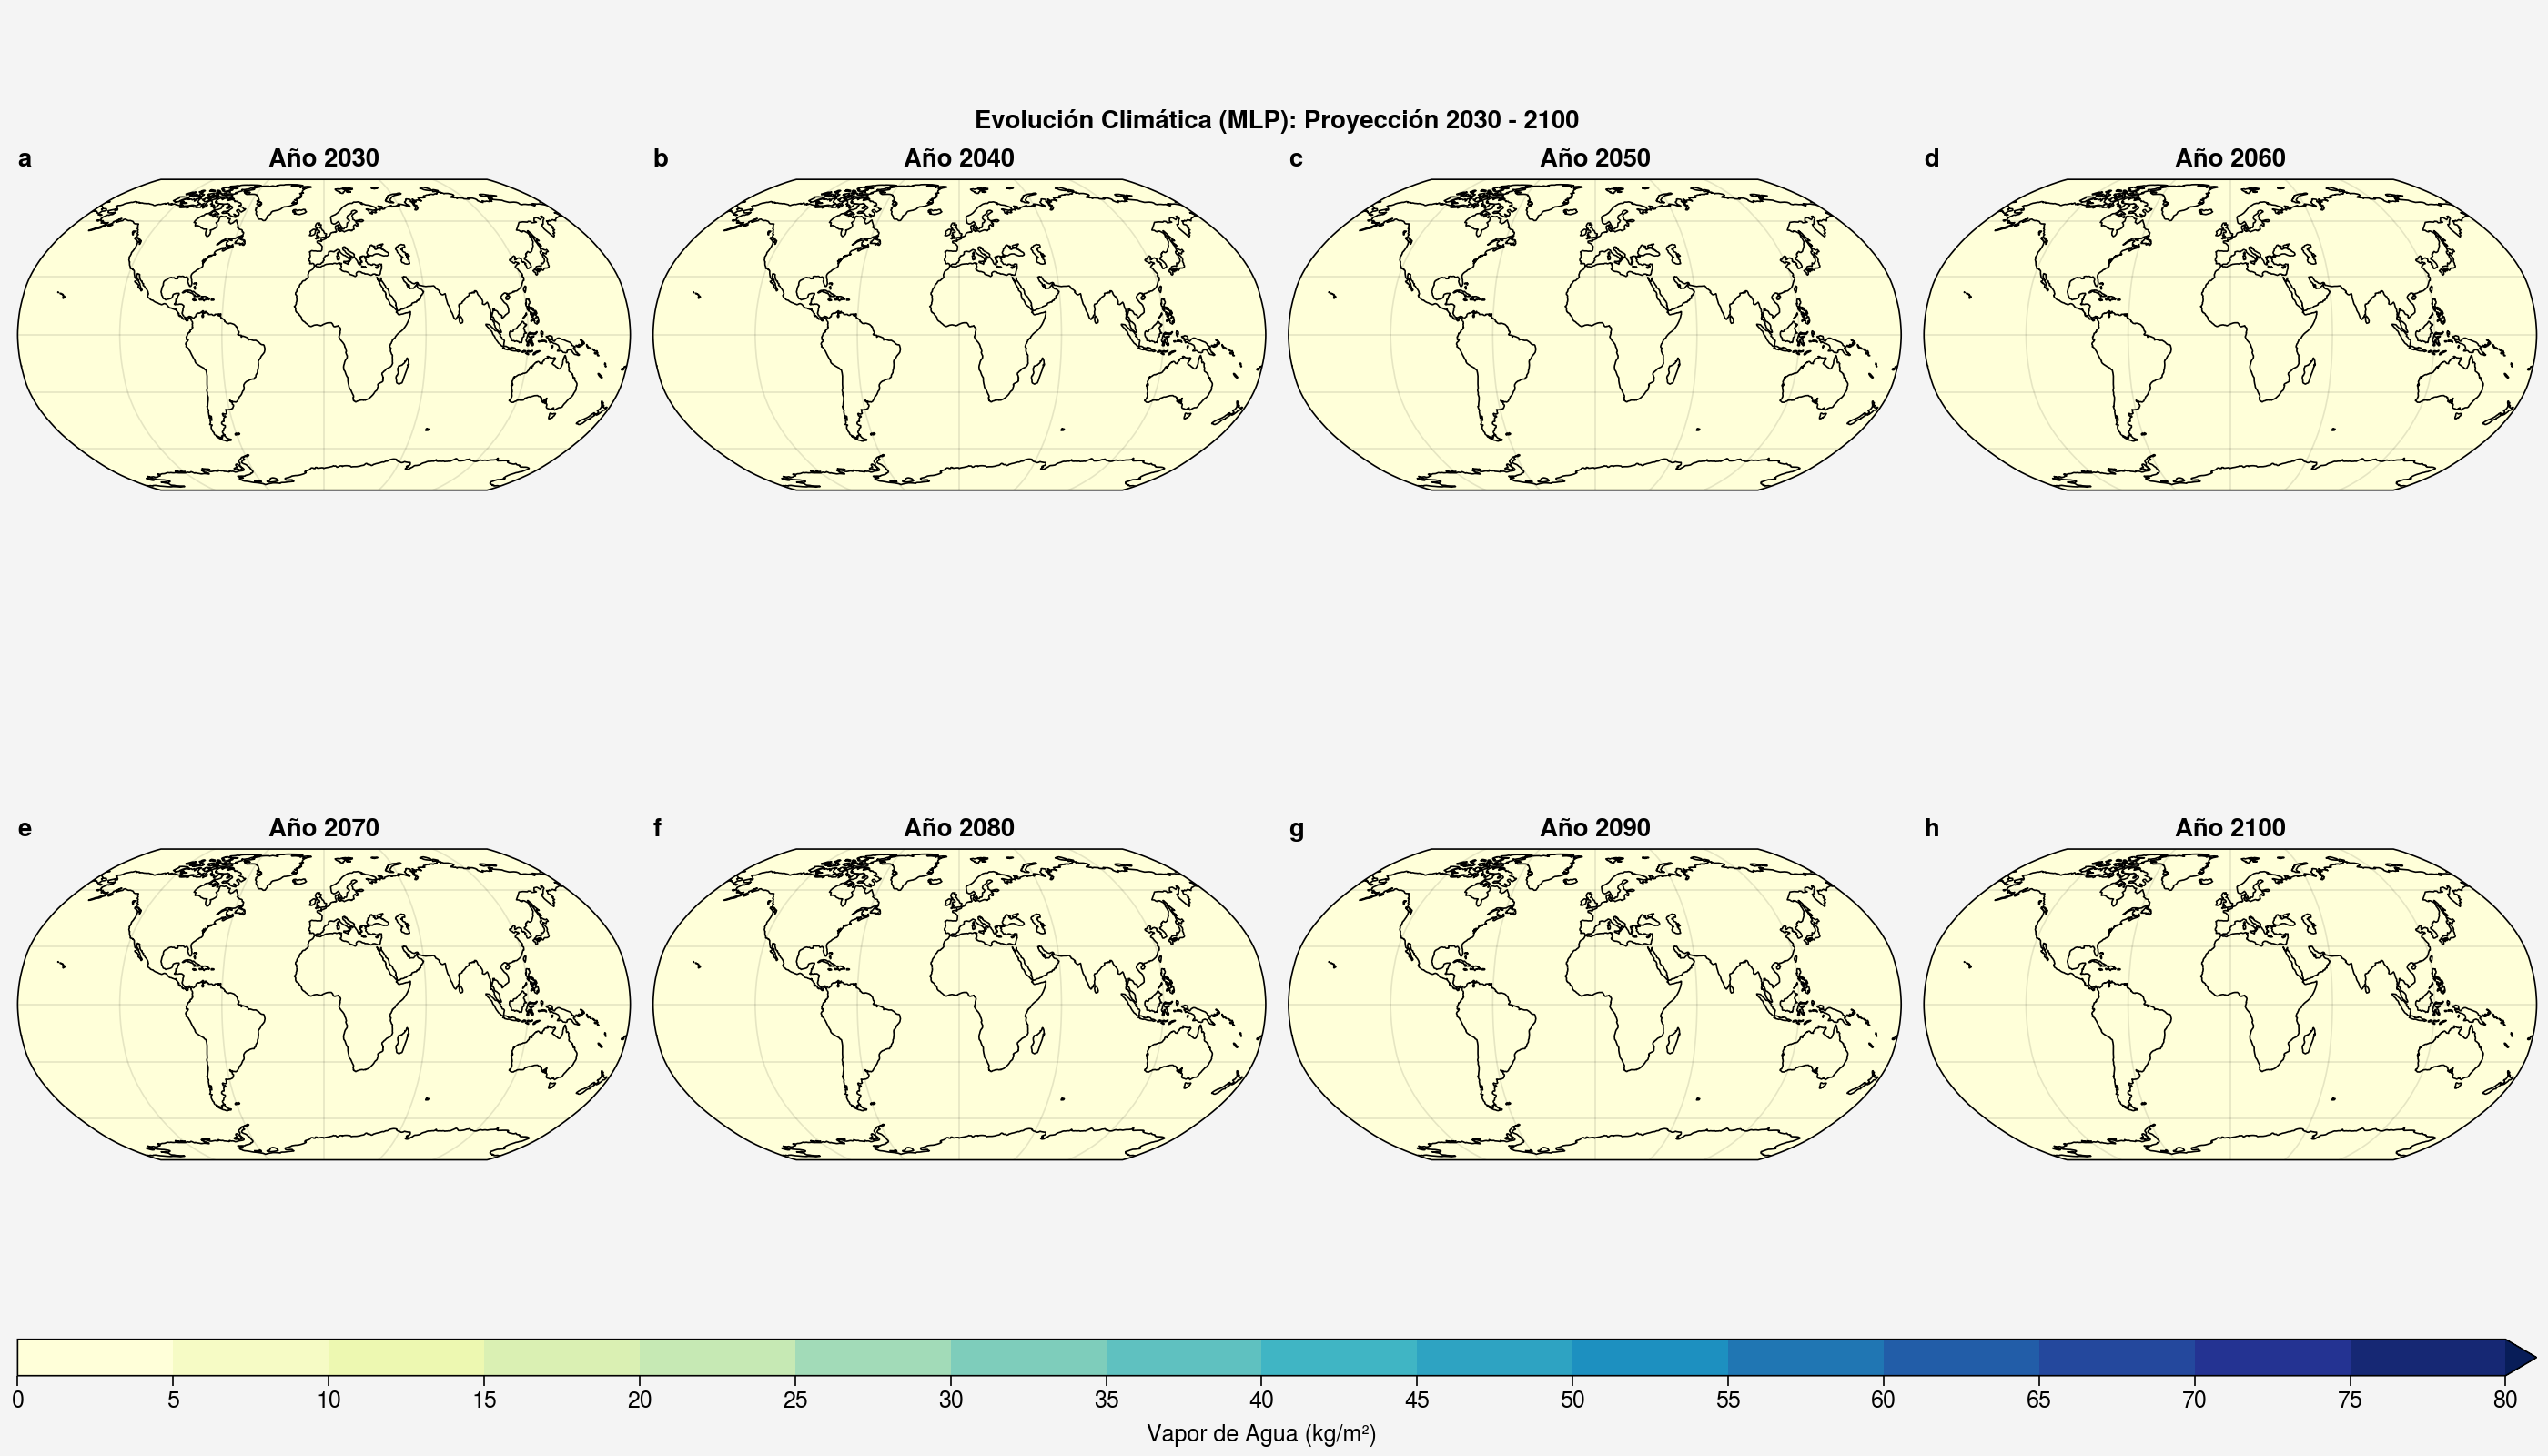

In [5]:
import xarray as xr
import ultraplot as uplt
import numpy as np
import matplotlib.pyplot as plt

# Cargar MLP
try:
    ds = xr.open_dataset('../outputs/proyeccion_2100_mlp.nc')
    # FIX DE EMERGENCIA: Clippeamos igual que la CNN por si explota
    ds['prw'] = ds['prw'].clip(min=0, max=80) 
except:
    print("❌ Falta proyeccion_2100_mlp.nc")

target_years = [2030, 2040, 2050, 2060, 2070, 2080, 2090, 2100]
levels = np.linspace(0, 80, 17)

# Crear Figura
fig, axs = uplt.subplots(ncols=4, nrows=2, proj='robin', width='14in', height='8in')
axs.format(coast=True, suptitle='Evolución Climática (MLP): Proyección 2030 - 2100', abc=True)

for i, ax in enumerate(axs):
    if i < len(target_years):
        try:
            data = ds['prw'].sel(time=f'{target_years[i]}-01', method='nearest')
            m = ax.contourf(data, cmap='YlGnBu', levels=levels, extend='max')
            ax.set_title(f'Año {target_years[i]}', weight='bold')
        except: pass

fig.colorbar(m, loc='b', label='Vapor de Agua (kg/m²)')
fig.save('../outputs/figures/proyeccion_mlp_decadas.png', dpi=300)
plt.show()